Music Popularity Analysis : 

Objective : The objective is to develop a predictive model that can accurately estimate the popularity of music tracks based on their audio 
    features. Accurate predictions of music popularity can assist music streaming platforms in better understanding user preferences, enhancing recommendation systems, and optimizing playlists to boost user engagement.

In [1]:
import pandas as pd 
spotify = pd.read_csv("D:\Data science\Personal Project\Spotify Case Study\Spotify_data.csv") 

In [2]:
spotify.head()

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Not Like Us,Kendrick Lamar,Not Like Us,5JjnoGJyOxfSZUZtk2rRwZ,6AI3ezQ4o3HUoP6Dhudph3,96,2024-05-04,274192,True,...,0.472,1,-7.001,1,0.0776,0.0107,0.000000,0.1410,0.214,101.061
1,1,Houdini,Eminem,Houdini,6Xuu2z00jxRPZei4IJ9neK,2HYFX63wP3otVIvopRS99Z,94,2024-05-31,227239,True,...,0.887,9,-2.760,0,0.0683,0.0292,0.000002,0.0582,0.889,127.003
2,2,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",BAND4BAND (feat. Lil Baby),4AzPr5SUpNF553eC1d3aRy,7iabz12vAuVQYyekFIWJxD,91,2024-05-23,140733,True,...,0.764,11,-5.241,1,0.2040,0.3590,0.000000,0.1190,0.886,140.113
3,3,I Don't Wanna Wait,"David Guetta, OneRepublic",I Don't Wanna Wait,0wCLHkBRKcndhMQQpeo8Ji,331l3xABO0HMr1Kkyh2LZq,90,2024-04-05,149668,False,...,0.714,1,-4.617,0,0.0309,0.0375,0.000000,0.2320,0.554,129.976
4,4,Pedro,"Jaxomy, Agatino Romero, Raffaella Carrà",Pedro,5y6RXjI5VPR0RyInghTbf1,48lxT5qJF0yYyf2z4wB4xW,89,2024-03-29,144846,False,...,0.936,9,-6.294,1,0.3010,0.0229,0.000001,0.3110,0.844,151.019


In [3]:
spotify.drop(columns=["Unnamed: 0"], inplace = True)
spotify.info() # To get overview of the columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

EDA : Observe the relationship between 'Target' features and All the 'Music' features.
As we know that main agenda of this case study is understand and predict popularity of the songs, we consider POPULARITY as a Target Feature.

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# Feature which are most relevant to nowadays to any trending song.
features  = ["Energy", "Valence", "Danceability", "Loudness", "Acousticness"]

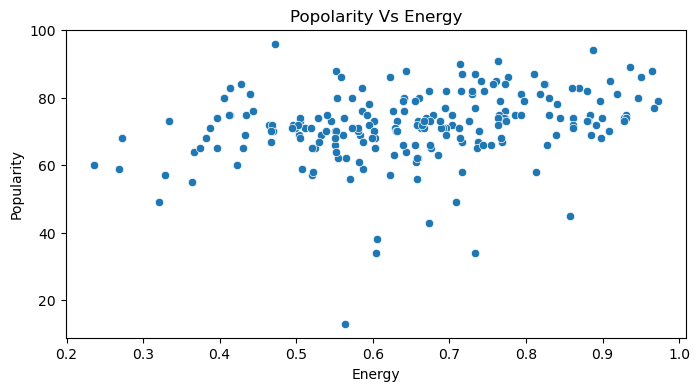

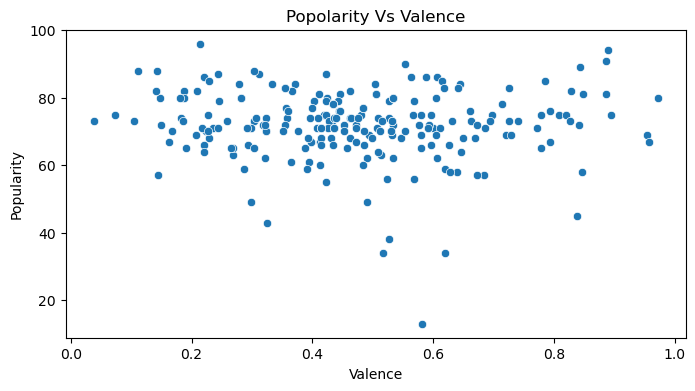

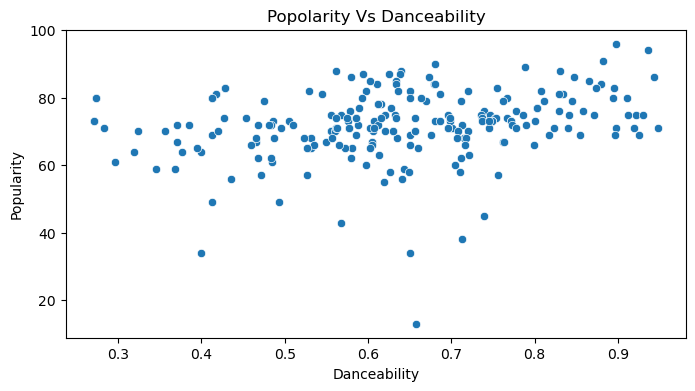

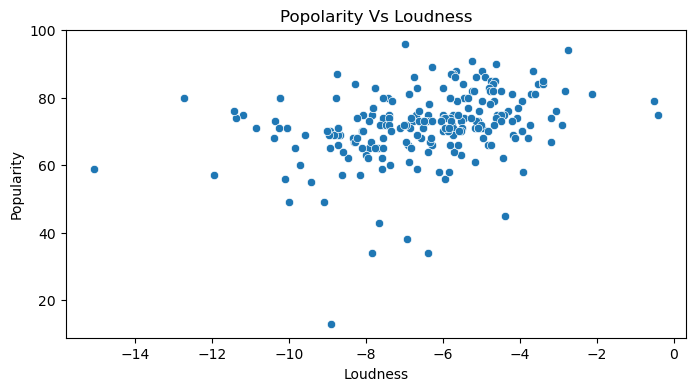

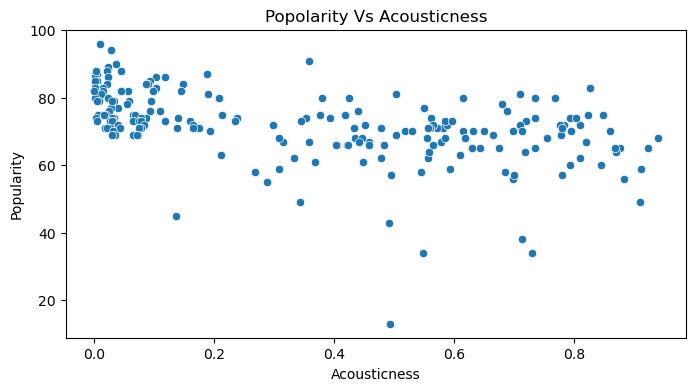

In [6]:
for ft in features:
    plt.figure(figsize=(8,4)) 
    sns.scatterplot(data=spotify, x = ft, y = "Popularity")
    plt.title(f'Popolarity Vs {ft}')
    plt.show()

So we can observe that higher energy levels & danceability tend to have positive correlation with high popularity scores. 
Conversely, increased in Acousticness & lower in loudness levels generally correspound with lower popularity, Suggesting that more energetic and less acoustic tracks are favoured. 

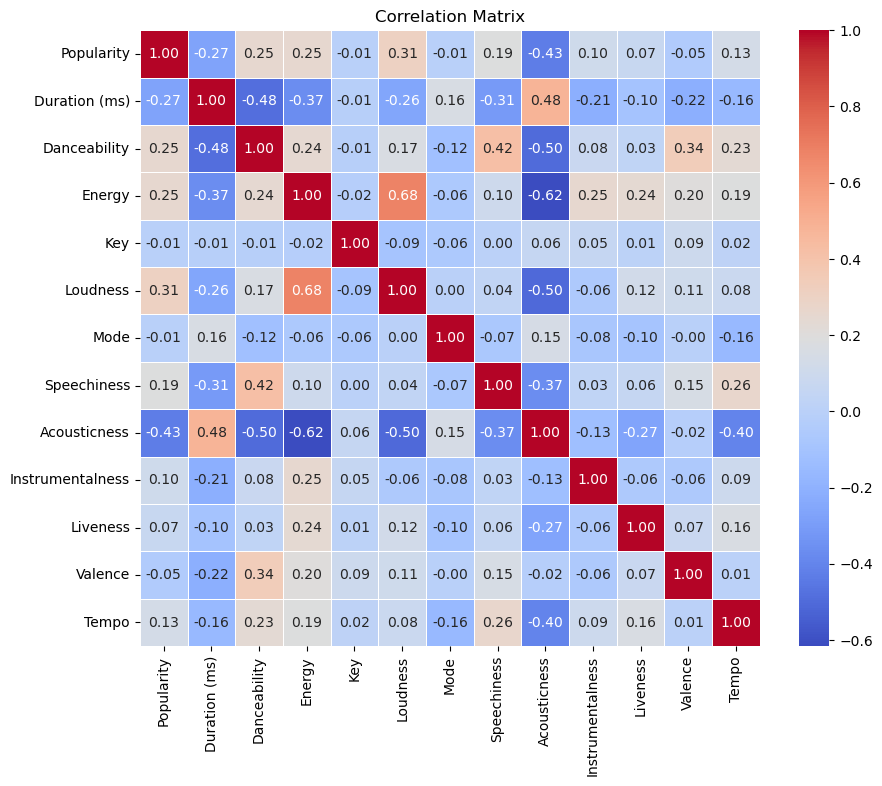

In [7]:
numeric = spotify.select_dtypes(include=['float64', 'int64']).columns 
n_data = spotify[numeric] 
cor_matrix = n_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix, we can see that popularity has a moderate positive correlation with loudness (0.31) and danceability (0.25), indicating that louder and more danceable tracks tend to be more popular. There is a moderate negative correlation between popularity and acousticness (-0.43), suggesting that tracks with higher acousticness are generally less popular. Energy also has a positive correlation with popularity (0.25).

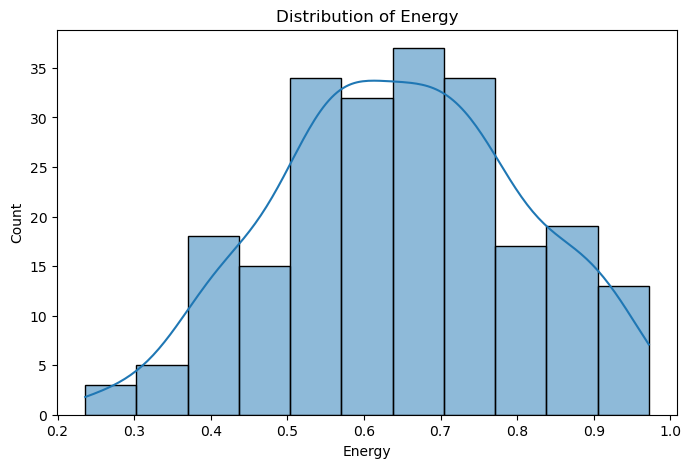

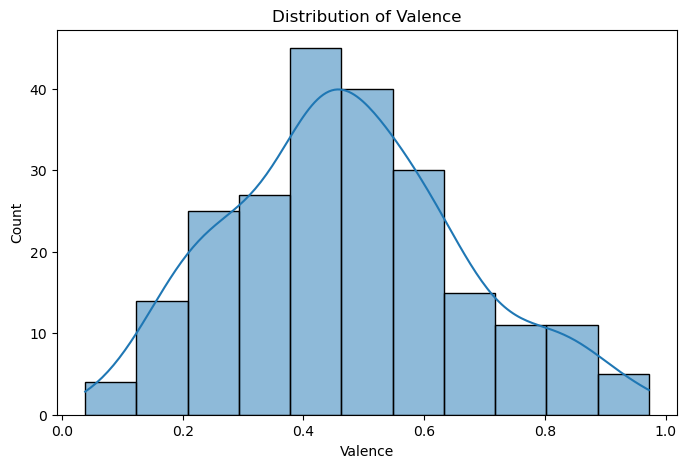

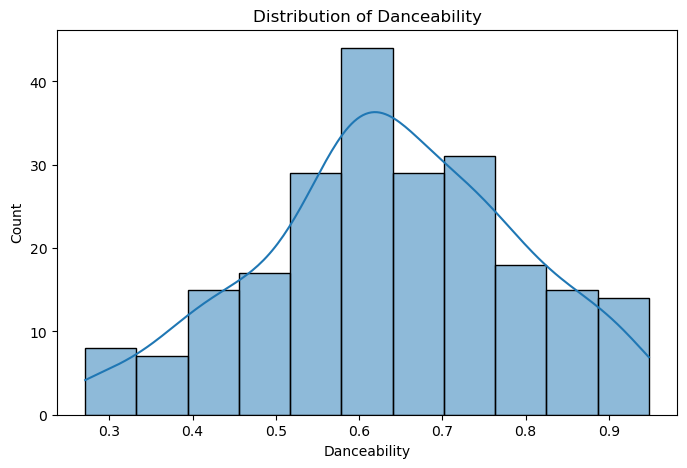

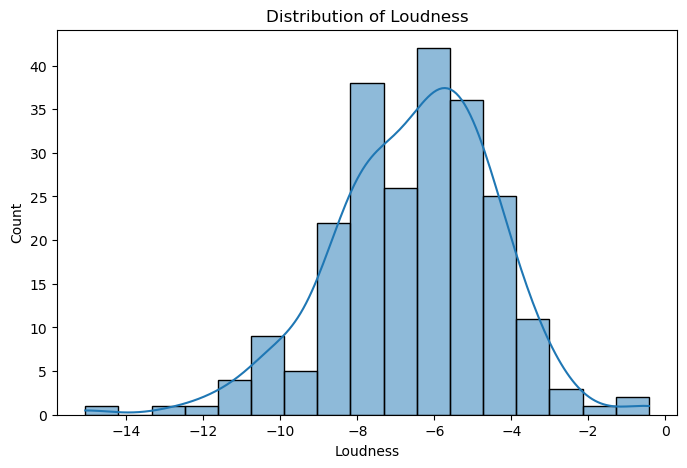

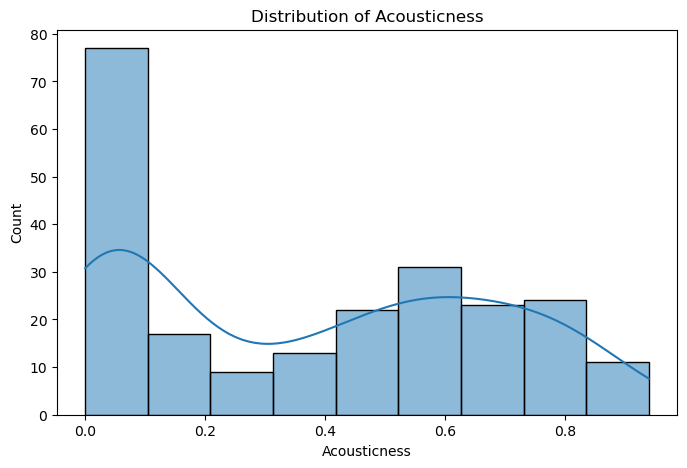

In [8]:
for ft in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(spotify[ft], kde=True)
    plt.title(f'Distribution of {ft}')
    plt.show()

The distribution of energy is roughly bell-shaped, which indicates a balanced range of energy levels in the tracks. Valence and danceability also follow a similar distribution, with most tracks having mid-range values, which suggests an even mix of emotionally positive and danceable tracks. Loudness has a near-normal distribution centred around -6 dB, which reflects typical volume levels in the dataset. Acousticness, however, is skewed towards lower values, indicating that most tracks are not highly acoustic.

Feature Selection and Model Training
Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:

Energy,
Valence,
Danceability,
Loudness,
Acousticness,
Tempo,
Speechiness,
Liveness.

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [10]:
ft = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
x = spotify[ft] 
y = spotify['Popularity'] 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [11]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(xtrain) 
scaled_testx = scaler.transform(xtest) 

In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid_search_rf.fit(scaled_x, ytrain)
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(scaled_testx)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asus\anaconda3\Lib\site-packages\s

Making Predictions 

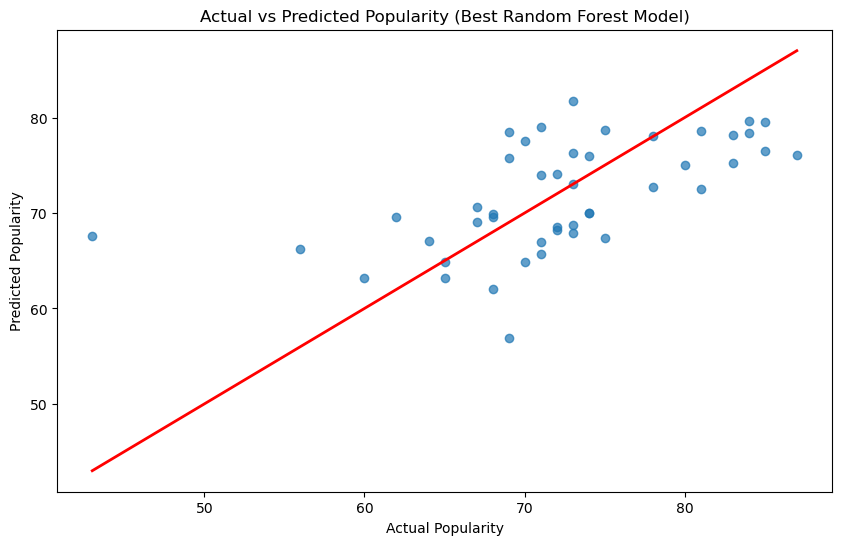

In [15]:
Prediction_y = best_rf_model.predict(scaled_testx)

plt.figure(figsize=(10, 6))
plt.scatter(ytest, Prediction_y, alpha=0.7)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. However, there are some deviations, particularly at lower popularity values, which suggest areas where the model’s predictions are less precise.